# Problem 2:

ISLR
Problem 8 
Page 299
Fit some of the non-linear models investigated in this chapter to the
Auto data set. Is there evidence for non-linear relationships in this
data set? Create some informative plots to justify your answer.

In [ ]:
#Import Library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix

%matplotlib inline
plt.style.use('seaborn-white')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Machine Learning/HW#5

/content/drive/MyDrive/Colab Notebooks/Machine Learning/HW#5


In [ ]:
#Load file 
df=pd.read_csv("Auto_cleaned.csv", index_col=0)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [ ]:
#Performing non-linear model 
#Polynmial Regression and Steps function
X1 = PolynomialFeatures(1).fit_transform(df.cylinders.values.reshape(-1,1))
X2 = PolynomialFeatures(2).fit_transform(df.cylinders.values.reshape(-1,1))
X3 = PolynomialFeatures(3).fit_transform(df.cylinders.values.reshape(-1,1))
X4 = PolynomialFeatures(4).fit_transform(df.cylinders.values.reshape(-1,1))
X5 = PolynomialFeatures(5).fit_transform(df.cylinders.values.reshape(-1,1))

y = (df.mpg > 25).map({False:0, True:1}).values
print('X5:\n', X5[:5])
print('y:\n', y[:5])


X5:
 [[1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]]
y:
 [0 0 0 0 0]


In [ ]:
fit2 = sm.GLS(df.mpg, X5).fit()
fit2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-26.3632,36.552,-0.721,0.471,-98.228,45.502
x1,-13.4532,19.113,-0.704,0.482,-51.031,24.124
x2,25.0243,33.306,0.751,0.453,-40.458,90.507
x3,-7.1260,11.982,-0.595,0.552,-30.683,16.431
x4,0.7540,1.683,0.448,0.654,-2.555,4.063
x5,-0.0272,0.082,-0.330,0.741,-0.189,0.135


In [ ]:
fit_1 =  sm.GLS(df.mpg, X1).fit()
fit_2 =  sm.GLS(df.mpg, X2).fit()
fit_3 =  sm.GLS(df.mpg, X3).fit()
fit_4 =  sm.GLS(df.mpg, X4).fit()
fit_5 =  sm.GLS(df.mpg, X5).fit()

sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9415.910391,0.0,NaN,NaN,NaN
1,389.0,9350.088340,1.0,6.582205e+01,2.981236,8.502882e-02
2,388.0,8544.703484,1.0,8.053849e+02,36.477784,3.618403e-09
3,387.0,8544.486702,1.0,2.167819e-01,0.009819,9.211192e-01
4,387.0,8544.486702,-0.0,3.637979e-12,-inf,NaN


In [ ]:
X = X3

In [ ]:
clf = sm.GLM(y, X, family=sm.families.Binomial(sm.families.links.logit))
res = clf.fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


In [ ]:
cylinders_grid = np.arange(df.cylinders.min(), df.cylinders.max()).reshape(-1,1)

In [ ]:
X_test = PolynomialFeatures(3).fit_transform(cylinders_grid)
pred = res.predict(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


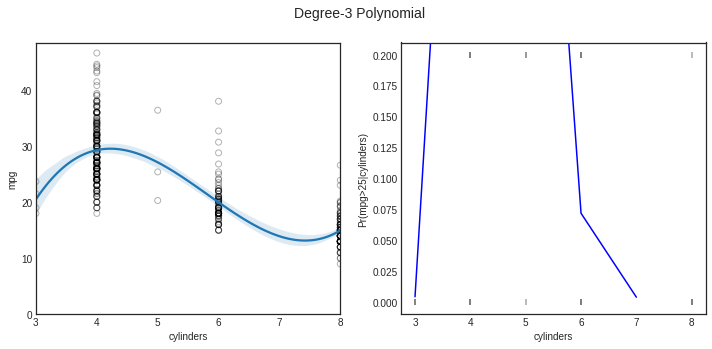

In [ ]:
# creating plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Degree-3 Polynomial', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(df.cylinders, df.mpg, facecolor='None', edgecolor='k', alpha=0.3)
sns.regplot(df.cylinders, df.mpg, order = 3, truncate=True, scatter=False, ax=ax1)
ax1.set_ylim(ymin=0)

#Polynomail regres provides extends linear model by adding extra predictors.

# Logistic regression showing Pr(mpg>25) for the age range.
ax2.plot(cylinders_grid, pred, color='b')

# Rug plot showing the distribution of mpg>25 in the training data.
# 'True' on the top, 'False' on the bottom.
ax2.scatter(df.cylinders, y/5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('cylinders')
ax2.set_ylabel('Pr(mpg>25|cylinders)');


#Blue solid  lines shows degree 3 polynomial(Left)
#Right: We model the binary event mpg>250 using logistic regression, again with a degree-3 polynomial.

In [ ]:
#Step Function
#Step function produces qualitative variable
df_cut, bins = pd.cut(df.cylinders, 3, retbins=True, right=True)
df_cut.value_counts(sort=False)

(2.995, 4.667]    203
(4.667, 6.333]     86
(6.333, 8.0]      103
Name: cylinders, dtype: int64

In [ ]:
df_steps = pd.concat([df.cylinders, df_cut, df.mpg], keys=['cylinders','cylinders_cuts','mpg'], axis=1)
df_steps.head(5)

,cylinders,cylinders_cuts,mpg
1,8,"(6.333, 8.0]",18.0
2,8,"(6.333, 8.0]",15.0
3,8,"(6.333, 8.0]",18.0
4,8,"(6.333, 8.0]",16.0
5,8,"(6.333, 8.0]",17.0


In [ ]:
# Create dummy variables for the  groups
df_steps_dummies = pd.get_dummies(df_steps['cylinders_cuts'])

# Statsmodels requires explicit adding of a constant (intercept)
df_steps_dummies = sm.add_constant(df_steps_dummies)

df_steps_dummies.head(5)

,const,"(2.995, 4.667]","(4.667, 6.333]","(6.333, 8.0]"
1,1.0,0,0,1
2,1.0,0,0,1
3,1.0,0,0,1
4,1.0,0,0,1
5,1.0,0,0,1


In [ ]:
# Using statsmodels because it has a more complete output for coefficients
fit3 = sm.GLM(df_steps.mpg, df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1)).fit()
fit3.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,29.1118,0.338,86.224,0.000,28.450,29.774
"(4.667, 6.333]",-8.8804,0.619,-14.348,0.000,-10.094,-7.667
"(6.333, 8.0]",-14.1487,0.582,-24.313,0.000,-15.289,-13.008


In [ ]:
# Put the test data in the same bins as the training data.
bin_mapping = np.digitize(cylinders_grid.ravel(), bins)
bin_mapping

array([1, 1, 2, 2, 3])

In [ ]:
# Get dummies, drop first dummy category, add constant
X_test2 = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis=1))
X_test2.head()

,const,2,3
0,1.0,0,0
1,1.0,0,0
2,1.0,1,0
3,1.0,1,0
4,1.0,0,1


In [ ]:
#Linear regression
pred2 = fit3.predict(X_test2)

In [ ]:
#Logistic Regression
clf2 = sm.GLM(y, df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1),
              family=sm.families.Binomial(sm.families.links.logit))
res2 = clf2.fit()
pred3 = res2.predict(X_test2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


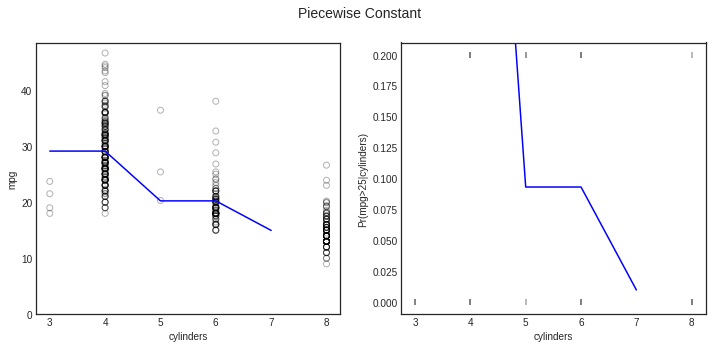

In [ ]:
# creating plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(df.cylinders, df.mpg, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(cylinders_grid, pred2, c='b')

ax1.set_xlabel('cylinders')
ax1.set_ylabel('mpg')
ax1.set_ylim(ymin=0)

# Logistic regression showing Pr(mpg>25) for the mpg range.
ax2.plot(np.arange(df.cylinders.min(), df.cylinders.max()).reshape(-1,1), pred3, color='b')

# Rug plot showing the distribution of mpg>25 in the training data.
# 'True' on the top, 'False' on the bottom.
ax2.scatter(df.cylinders, y/5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('cylinders')
ax2.set_ylabel('Pr(mpg>25|cylinders)');




In [ ]:
#Splines 

#Cubic Splines

#Regression splines are more flexible than polynomials and step functions, 
#and in fact are an extension of the two. 
#They involve dividing the range of X into K distinct regions. Within each regional polynomial function is fit to the data. However, these polynomialsare constrained so that they join smoothly at the region boundaries,or knots

transformed_x = dmatrix("bs(df.cylinders, knots=(5,6,7), degree=3, include_intercept=False)",
                        {"df.cylinders": df.cylinders}, return_type='dataframe')
fit4 = sm.GLM(df.mpg, transformed_x).fit()
pred4 = fit4.predict(dmatrix("bs(cylinders_grid, knots=(5,6,7), degree=3, include_intercept=False)",
                             {"cylinders_grid": cylinders_grid}, return_type='dataframe'))
fit4.params

Intercept                                                                  20.550000
bs(df.cylinders, knots=(5, 6, 7), degree=3, include_intercept=False)[0]     9.881618
bs(df.cylinders, knots=(5, 6, 7), degree=3, include_intercept=False)[1]    11.764109
bs(df.cylinders, knots=(5, 6, 7), degree=3, include_intercept=False)[2]    -2.450720
bs(df.cylinders, knots=(5, 6, 7), degree=3, include_intercept=False)[3]    -1.866556
bs(df.cylinders, knots=(5, 6, 7), degree=3, include_intercept=False)[4]     0.000000
bs(df.cylinders, knots=(5, 6, 7), degree=3, include_intercept=False)[5]    -5.586893
dtype: float64

In [ ]:
# Specifying 6 degrees of freedom 
#, it is unusual to use d greater than 3 or 4 because for large values of d, the polynomial curve can become overly flexible and can take on some very strange shapes.
transformed_x2 = dmatrix("bs(df.cylinders, df=6, degree=3, include_intercept=False)",
                        {"df.cylinders": df.cylinders}, return_type='dataframe')
fit5 = sm.GLM(df.mpg, transformed_x2).fit()
pred5 = fit5.predict(dmatrix("bs(cylinders_grid, df=6, degree=3, include_intercept=False)",
                             {"cylinders_grid": cylinders_grid}, return_type='dataframe'))
fit5.params

Intercept                                                       1.517196e+01
bs(df.cylinders, df=6, degree=3, include_intercept=False)[0]    1.288256e-15
bs(df.cylinders, df=6, degree=3, include_intercept=False)[1]    1.324499e+01
bs(df.cylinders, df=6, degree=3, include_intercept=False)[2]    1.757981e+01
bs(df.cylinders, df=6, degree=3, include_intercept=False)[3]   -7.796246e+00
bs(df.cylinders, df=6, degree=3, include_intercept=False)[4]   -5.050394e+00
bs(df.cylinders, df=6, degree=3, include_intercept=False)[5]    0.000000e+00
dtype: float64

In [ ]:
#Natural 
transformed_x3 = dmatrix("cr(df.cylinders, df=4)", {"df.cylinders": df.cylinders}, return_type='dataframe')
fit6 = sm.GLM(df.mpg, transformed_x3).fit()
pred6 = fit6.predict(dmatrix("cr(cylinders_grid, df=4)", {"cylinders_grid": cylinders_grid}, return_type='dataframe'))
fit6.params

Intercept                    17.540952
cr(df.cylinders, df=4)[0]     2.998359
cr(df.cylinders, df=4)[1]    12.563534
cr(df.cylinders, df=4)[2]     4.557040
cr(df.cylinders, df=4)[3]    -2.577981
dtype: float64

(0.0, 50.0)

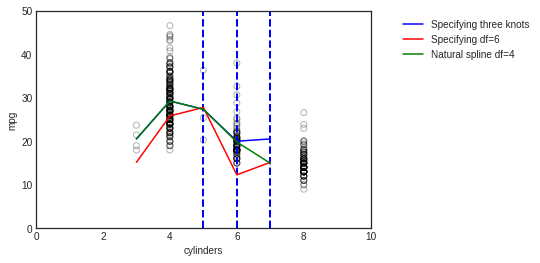

In [ ]:
plt.scatter(df.cylinders, df.mpg, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(cylinders_grid, pred4, color='b', label='Specifying three knots')
plt.plot(cylinders_grid, pred5, color='r', label='Specifying df=6')
plt.plot(cylinders_grid, pred6, color='g', label='Natural spline df=4')
[plt.vlines(i , 0, 350, linestyles='dashed', lw=2, colors='b') for i in [5,6,7]]
plt.legend(bbox_to_anchor=(1.5, 1.0))

plt.xlabel('cylinders')
plt.ylabel('mpg');
plt.xlim(0,10)
plt.ylim(0,50)


#Hence blue line denotes 3 knotes 
#Red specifiying df=6
#Green We get natural spine df=4 